In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

set_default(figsize=(10, 10), dpi=100)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
N = 1000 # Number of examples
C = 1    # Number of classes
D = 1    # Number of dimesnsions

h = 100    # hiden units

In [10]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)
    
print("Shapes:")
print("X:", tuple(X.size())) 
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


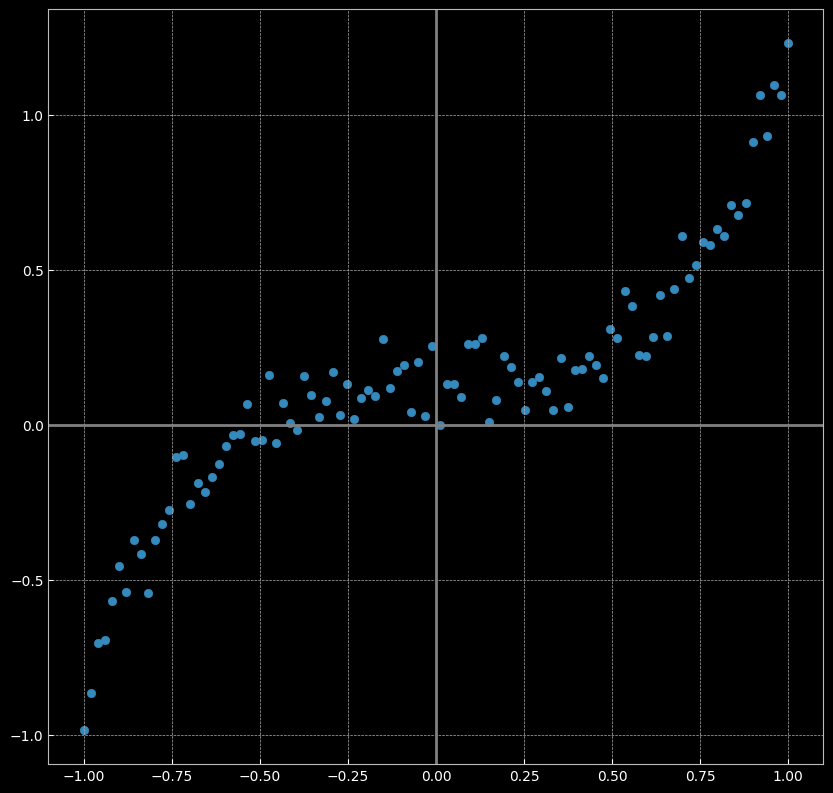

In [13]:
def plot_data(X, y):

    #plt.figure(figsize=(10,10))

    plt.scatter(X,y)

    plt.axhline(c='grey')
    plt.axvline(c='grey')
    
plot_data(X, y)

## Linear model

In [14]:
model = torch.nn.Sequential(
    torch.nn.Linear(D, h),
    torch.nn.Linear(h, C)
).to(device)

In [15]:
lossF = torch.nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [16]:
for epoch in range(1000):
    
    y_pred = model(X)
    scores, classes = torch.max(y_pred, 1)
    
    accuracy = (y == classes).sum().float() / len(y) 
    loss   = lossF(y_pred, y)
    
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (epoch, loss.item(), accuracy))
    display.clear_output(wait=True)
    
    optim.zero_grad()
    loss.backward()
    
    optim.step()

[EPOCH]: 999, [LOSS]: 0.032516, [ACCURACY]: 0.000


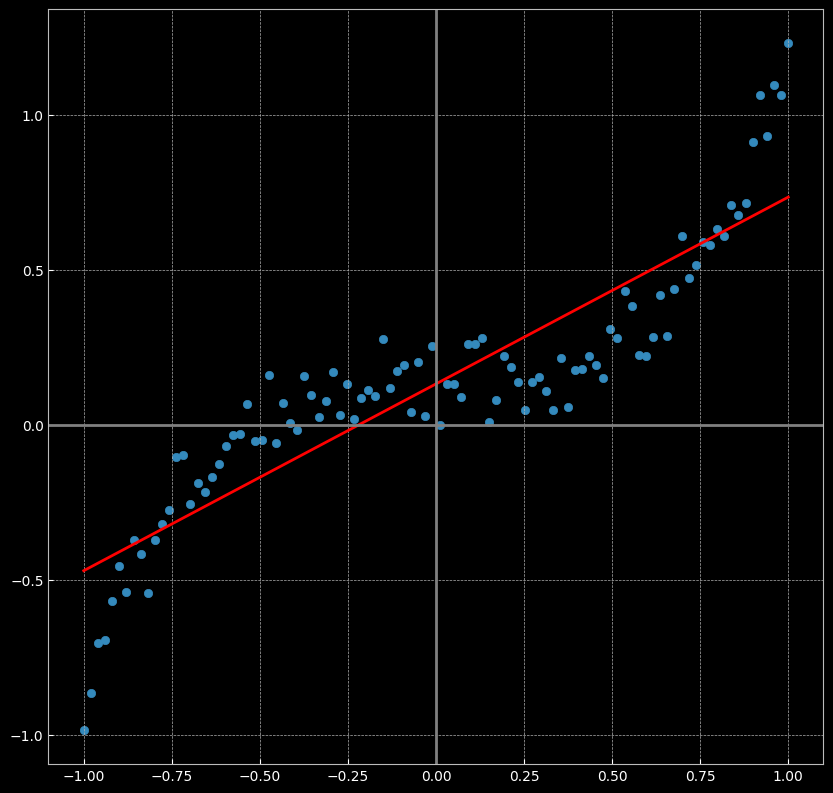

In [19]:
def plot_model(model):
    
    plt.plot(X, y_pred.detach().numpy(), 'r-')
    plot_data(X, y)
    
plot_model(model)

## Non-Linearity

In [11]:
model = torch.nn.Sequential(
    torch.nn.Linear(D, h),
    torch.nn.ReLU(),
    torch.nn.Linear(h, C)
).to(device)

In [12]:
lossF = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [13]:
for epoch in range(1000):
    
    y_pred = model(X)
    scores, classes = torch.max(y_pred, 1)
    
    accuracy = (y == classes).sum().float() / len(y) 
    loss   = lossF(y_pred, y)
    
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (epoch, loss.item(), accuracy))
    display.clear_output(wait=True)
    
    optim.zero_grad()
    loss.backward()
    
    optim.step()

[EPOCH]: 999, [LOSS]: 0.226299, [ACCURACY]: 0.947


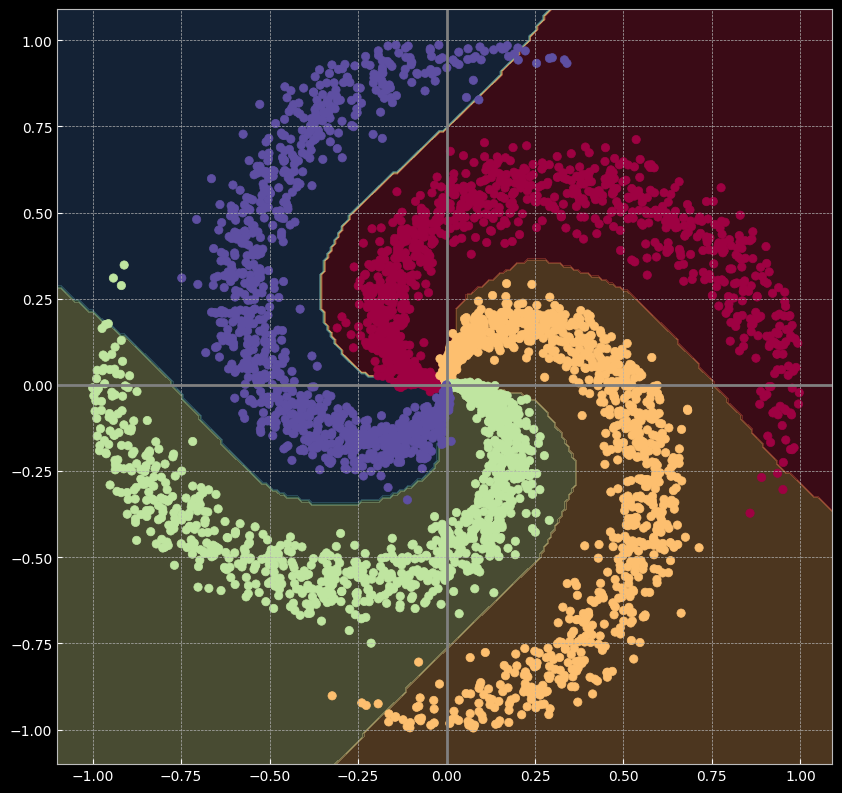

In [14]:
plot_model(model)